In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("master_table_output.csv")

C:\Users\histo\AppData\Local\Temp\ipykernel_20124\277074454.py:4: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("master_table_output.csv")


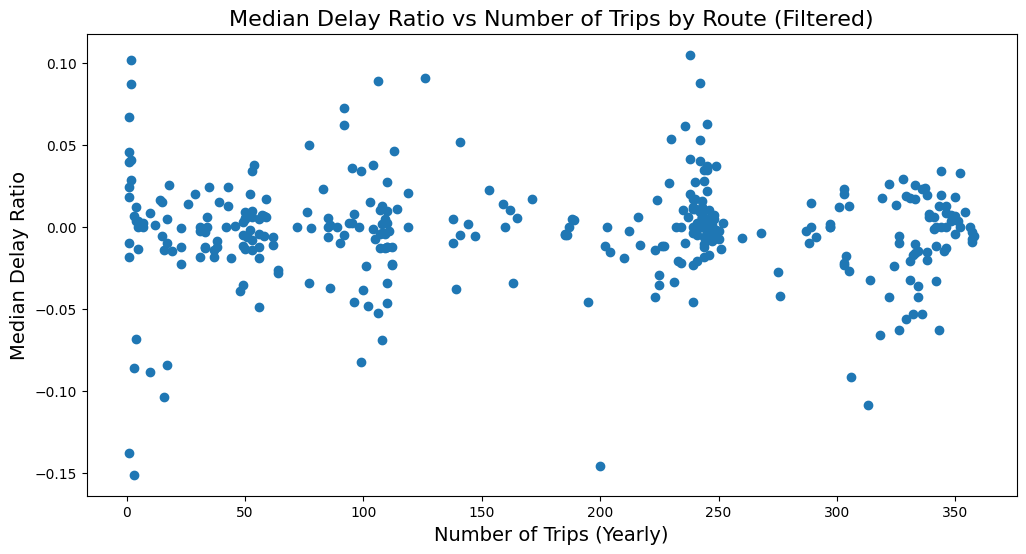

In [78]:
# Ensure the columns have proper data types
df['Total Trip Time (hrs)'] = pd.to_numeric(df['Total Trip Time (hrs)'], errors='coerce')
df['Total Delay (min)'] = pd.to_numeric(df['Total Delay (min)'], errors='coerce')

# Calculate the delay ratio
df['Delay Ratio'] = df['Total Delay (min)'] / (df['Total Trip Time (hrs)'] * 60)

# Filter out outliers
filtered_df = df[df['Delay Ratio'] > -0.2]
filtered_df = filtered_df[filtered_df['Delay Ratio'] < 0.2]


# Group data by Route Number
route_stats = filtered_df.groupby('Route Number').agg(
    num_trips=('Delay Ratio', 'count'),
    median_delay_ratio=('Delay Ratio', 'median')
).reset_index()

# Scatter
plt.figure(figsize=(12, 6))
plt.scatter(route_stats['num_trips'], route_stats['median_delay_ratio'])
plt.title('Median Delay Ratio vs Number of Trips by Route (Filtered)', fontsize=16)
plt.xlabel('Number of Trips (Yearly)', fontsize=14)
plt.ylabel('Median Delay Ratio', fontsize=14)
plt.show()

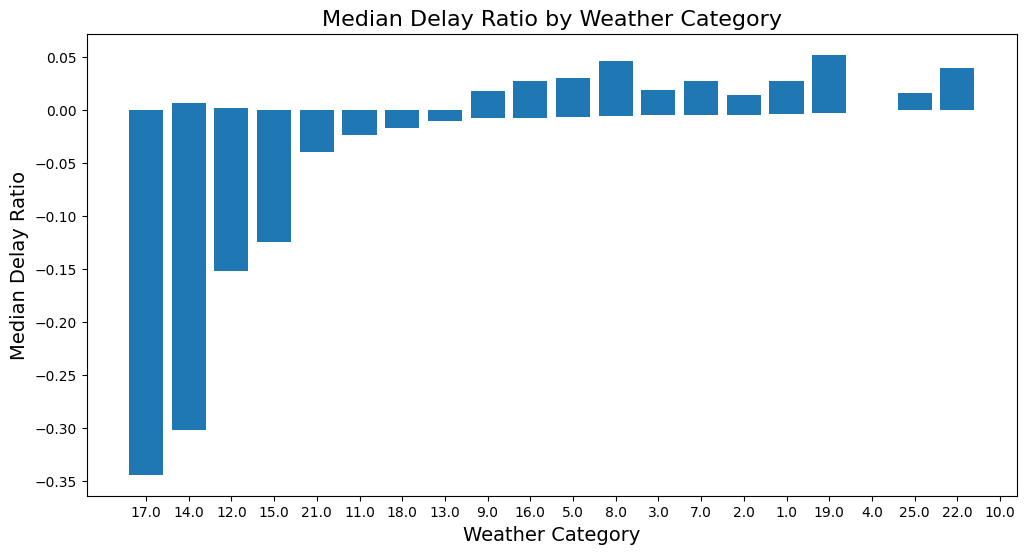

In [79]:

# Group data by Weather Category and calculate median delay ratio
weather_stats = df.groupby('Weather Category')['Delay Ratio'].median().reset_index()

weather_stats['Weather Category'] = weather_stats['Weather Category'].astype(str)

# Sort data by median delay ratio for cleaner view
weather_stats = weather_stats.sort_values(by='Delay Ratio')

# Bar
plt.figure(figsize=(12, 6))
plt.bar(weather_stats['Weather Category'], weather_stats['Delay Ratio'])
plt.title('Median Delay Ratio by Weather Category', fontsize=16)
plt.xlabel('Weather Category', fontsize=14)
plt.ylabel('Median Delay Ratio', fontsize=14)
plt.show()

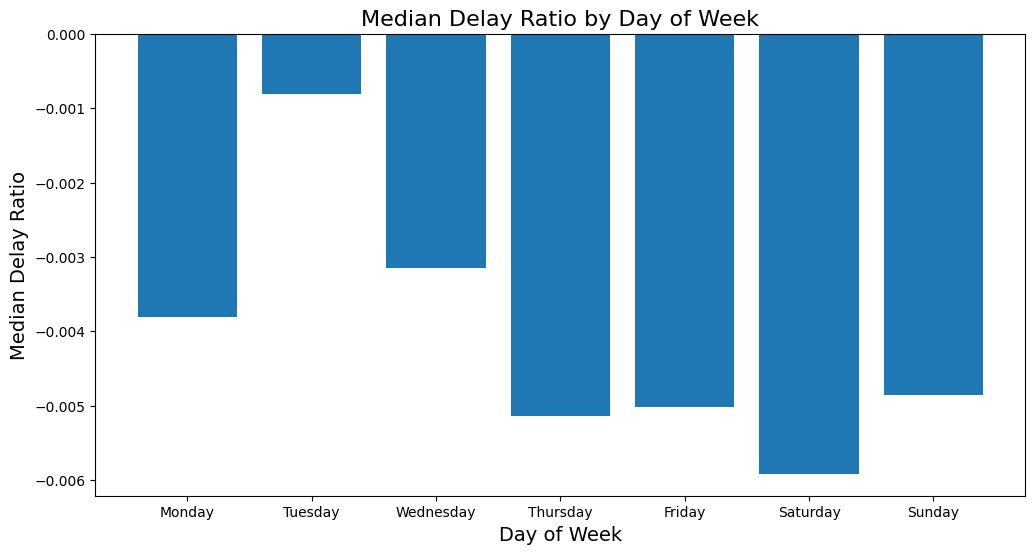

In [80]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week (full name)
df['Day of Week'] = df['Date'].dt.day_name()

# Group data by Day of Week and calculate median delay ratio
day_stats = df.groupby('Day of Week')['Delay Ratio'].median().reset_index()

# Sort days of the week in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats['Day of Week'] = pd.Categorical(day_stats['Day of Week'], categories=day_order, ordered=True)
day_stats = day_stats.sort_values(by='Day of Week')

# Bar
plt.figure(figsize=(12, 6))
plt.bar(day_stats['Day of Week'], day_stats['Delay Ratio'])
plt.title('Median Delay Ratio by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Median Delay Ratio', fontsize=14)
plt.show()


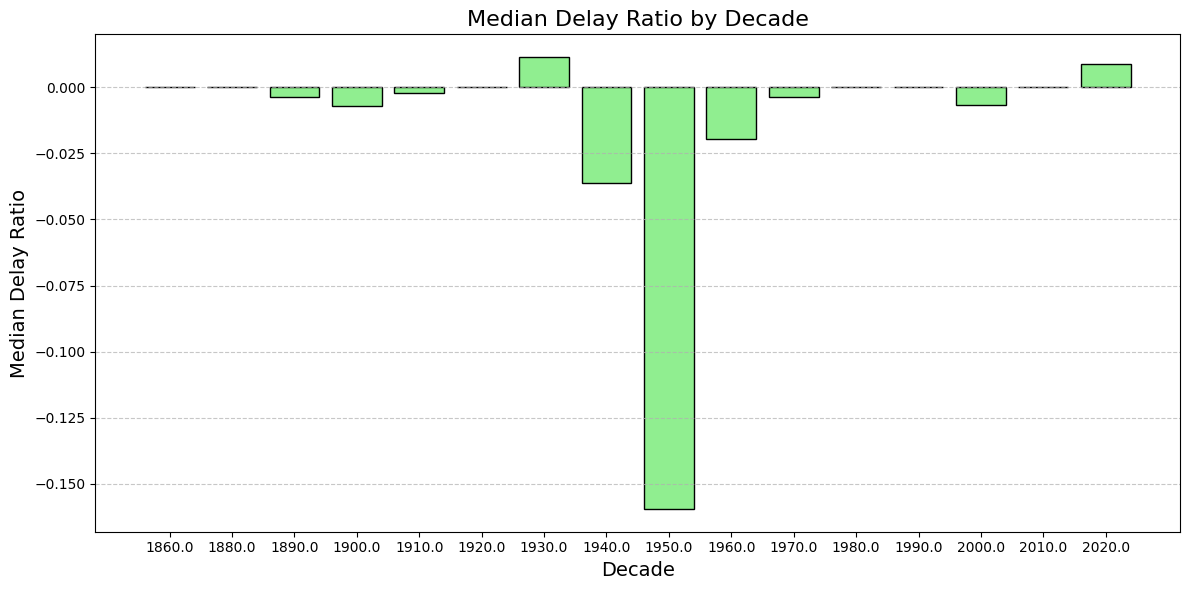

In [ ]:
# Convert 'Date Opened (Arrival)' to datetime
df['Date Opened (Arrival)'] = pd.to_datetime(df['Date Opened (Arrival)'], errors='coerce')

# Extract the year
df['Year Opened'] = df['Date Opened (Arrival)'].dt.year

# Group data by decade and calculate median delay ratio
df['Decade'] = (df['Year Opened'] // 10) * 10  # Group by decade
day_stats = df.groupby('Decade')['Delay Ratio'].median().reset_index()

# Count the number of samples for each decade
sample_counts = df.groupby('Decade').size().reset_index(name='Sample Count')

# Merge the sample counts with the day_stats
day_stats = pd.merge(day_stats, sample_counts, on='Decade')

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(day_stats['Decade'].astype(str), day_stats['Delay Ratio'])

plt.title('Median Delay Ratio by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Median Delay Ratio', fontsize=14)
plt.show()



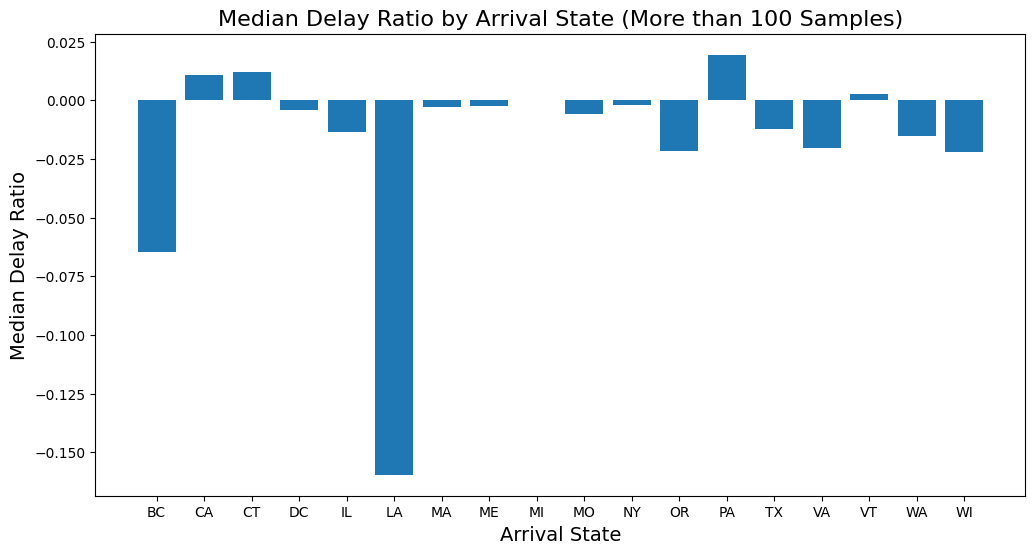

In [82]:
# Calculate sample counts for each 'Arrival State'
sample_counts = df.groupby('Arrival State').size().reset_index(name='Sample Count')

# Group by 'Arrival State' and calculate median delay ratio
state_stats = df.groupby('Arrival State')['Delay Ratio'].median().reset_index()

# Merge sample counts with state_stats
state_stats = pd.merge(state_stats, sample_counts, on='Arrival State')

# Filter to include only states with more than 100 samples
filtered_state_stats = state_stats[state_stats['Sample Count'] > 100]

# Sort by 'Arrival State' if you want to display in alphabetical order
filtered_state_stats = filtered_state_stats.sort_values(by='Arrival State')

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_state_stats['Arrival State'], filtered_state_stats['Delay Ratio'])


plt.title('Median Delay Ratio by Arrival State (More than 100 Samples)', fontsize=16)
plt.xlabel('Arrival State', fontsize=14)
plt.ylabel('Median Delay Ratio', fontsize=14)
plt.show()
